# Rs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

In [2]:
Data=pd.read_csv('Skyserver.csv')
Data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
Data.shape

(10000, 18)

# Exploratory Data Analysis

In [4]:
Data.info()#Checking information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


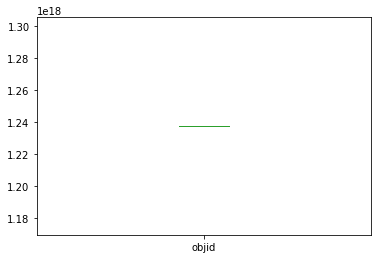

In [5]:
Data.objid.plot.box()

In [6]:
Data.objid.value_counts()

1.237650e+18    10000
Name: objid, dtype: int64

In [7]:
Data.specobjid.value_counts()

2.881270e+18    18
2.881220e+18    18
3.722230e+18    18
3.222410e+18    17
2.880120e+18    17
                ..
3.885350e+17     1
4.841730e+17     1
4.988460e+17     1
4.315780e+18     1
3.716180e+17     1
Name: specobjid, Length: 6349, dtype: int64

In [8]:
#The objid has same value for all observations so we drop the column
Data.drop(['objid'],axis=1,inplace=True)

In [9]:
Data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

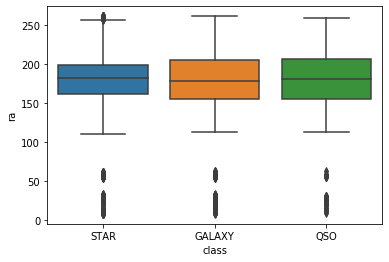

In [10]:
sns.boxplot(x='class',y='ra',data=Data)

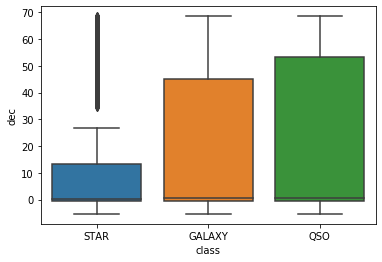

In [11]:
sns.boxplot(x='class',y='dec',data=Data)

With increase in declination the number of quasar increases.

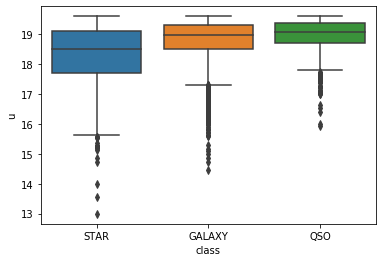

In [12]:
sns.boxplot(x='class',y='u',data=Data)

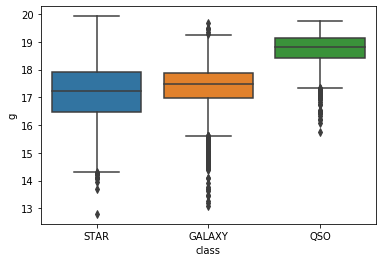

In [13]:
sns.boxplot(x='class',y='g',data=Data)

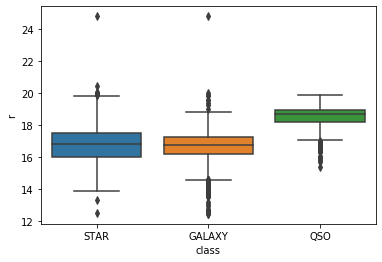

In [14]:
sns.boxplot(x='class',y='r',data=Data)

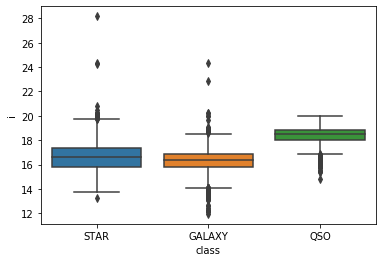

In [15]:
sns.boxplot(x='class',y='i',data=Data)

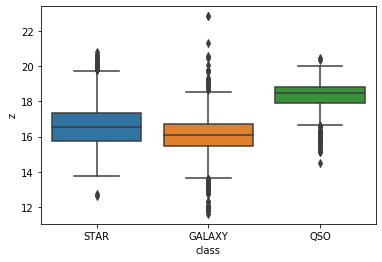

In [16]:
sns.boxplot(x='class',y='z',data=Data)

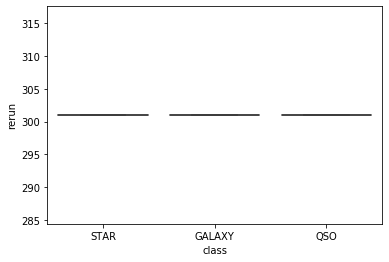

In [17]:
sns.boxplot(x='class',y='rerun',data=Data)

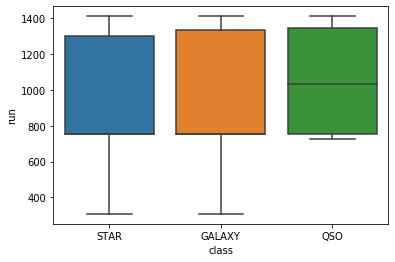

In [18]:
sns.boxplot(x='class',y='run',data=Data)

In [19]:
Data.rerun.value_counts()

301    10000
Name: rerun, dtype: int64

In [20]:
#As rerun of all the observations are same so we drop this column.
Data.drop(['rerun'],axis=1,inplace=True)

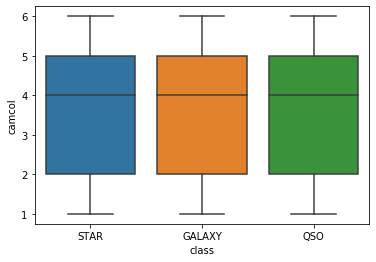

In [21]:
sns.boxplot(x='class',y='camcol',data=Data)

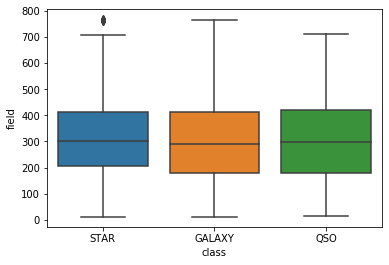

In [22]:
sns.boxplot(x='class',y='field',data=Data)

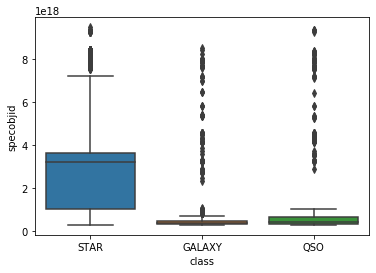

In [23]:
sns.boxplot(x='class',y='specobjid',data=Data)

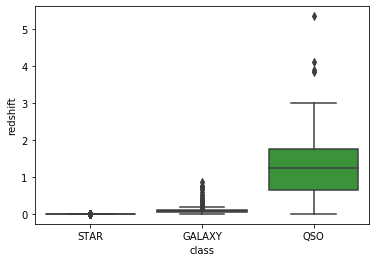

In [24]:
sns.boxplot(x='class',y='redshift',data=Data)

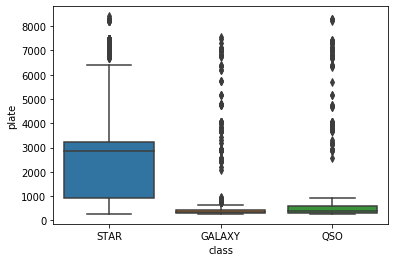

In [25]:
sns.boxplot(x='class',y='plate',data=Data)

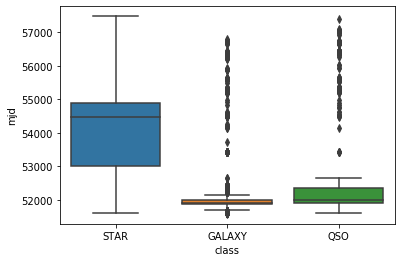

In [26]:
sns.boxplot(x='class',y='mjd',data=Data)

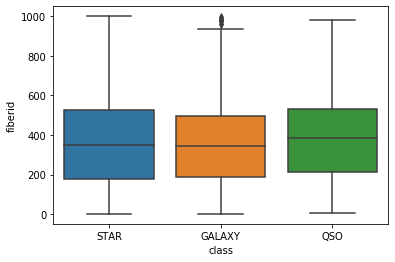

In [27]:
sns.boxplot(x='class',y='fiberid',data=Data)

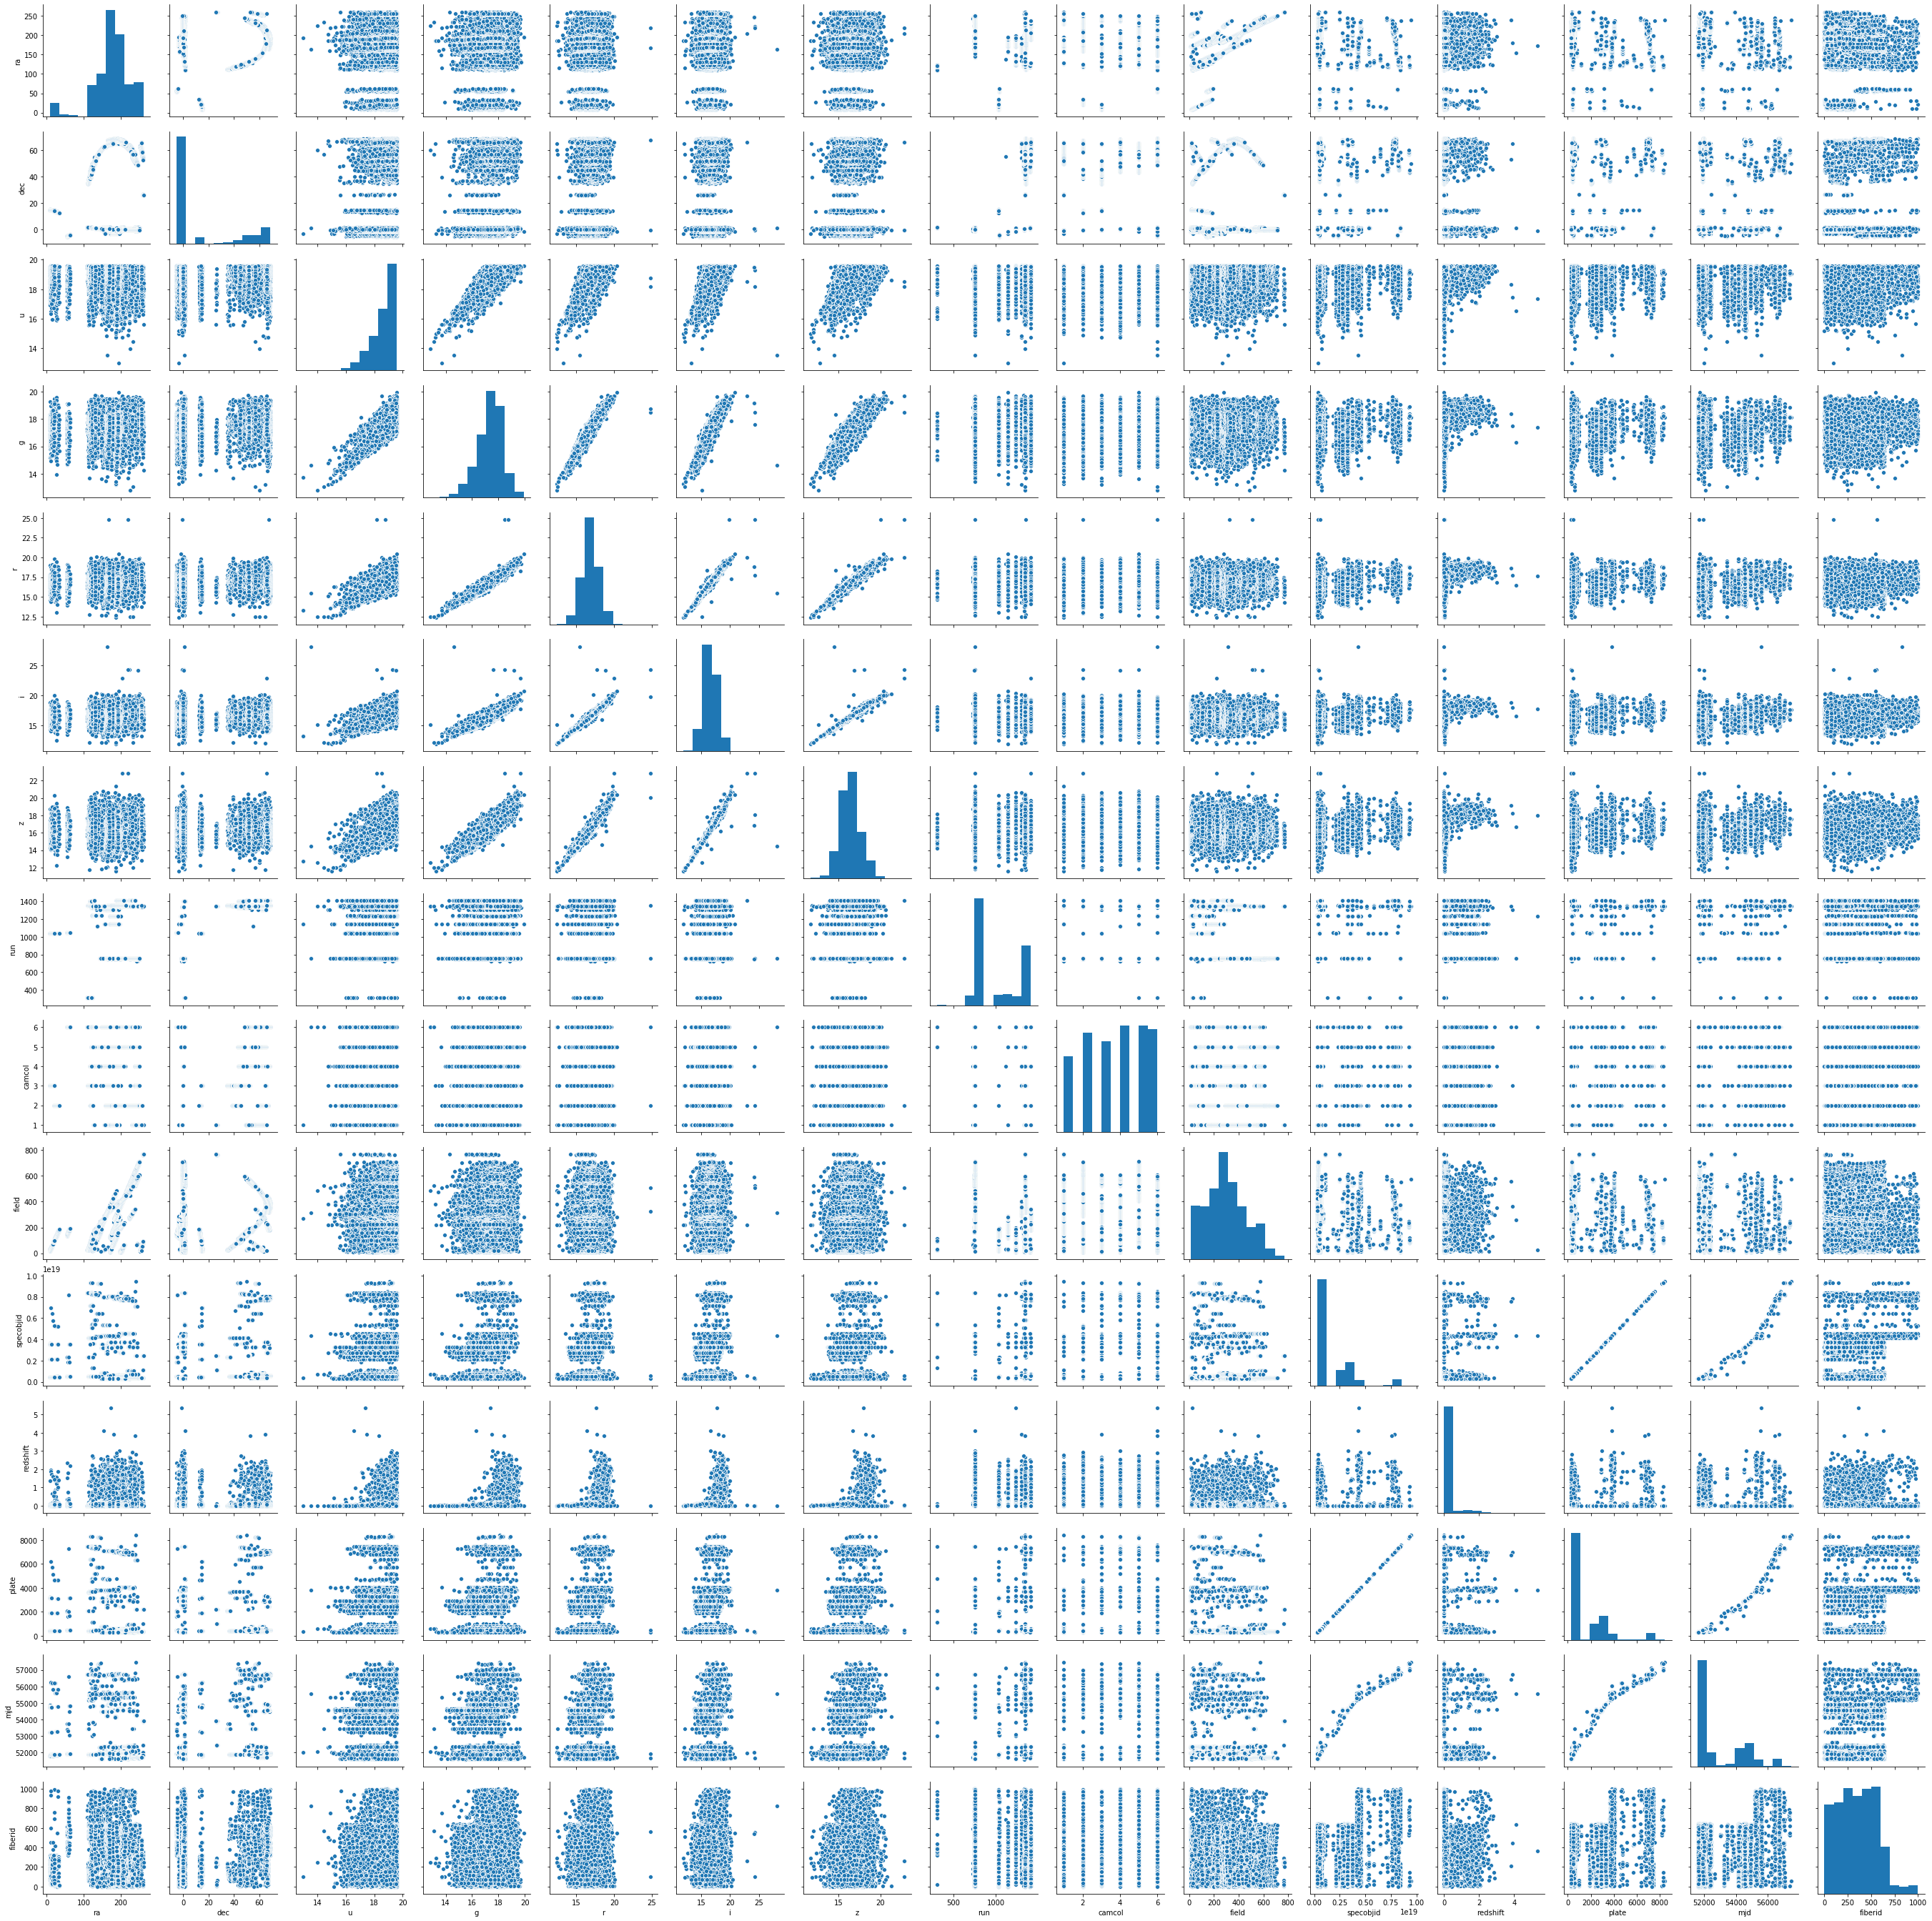

In [28]:
sns.pairplot(Data)

In [29]:
# Mapping the Target classes.
Data['class']=Data['class'].map({'STAR':0,'GALAXY':1,'QSO':2})

In [30]:
Data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,1,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,0,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,1,0.014019,447,51877,229


Checking for Correlation

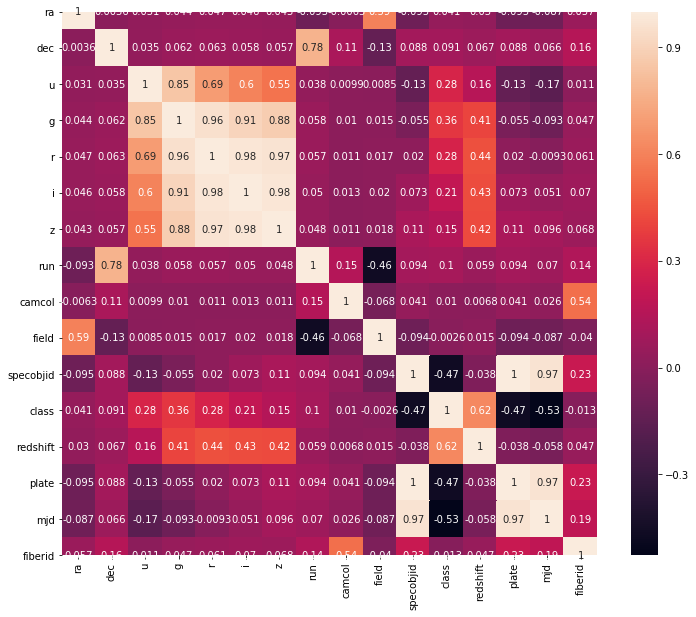

In [31]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

Checking for Outliers and removing them

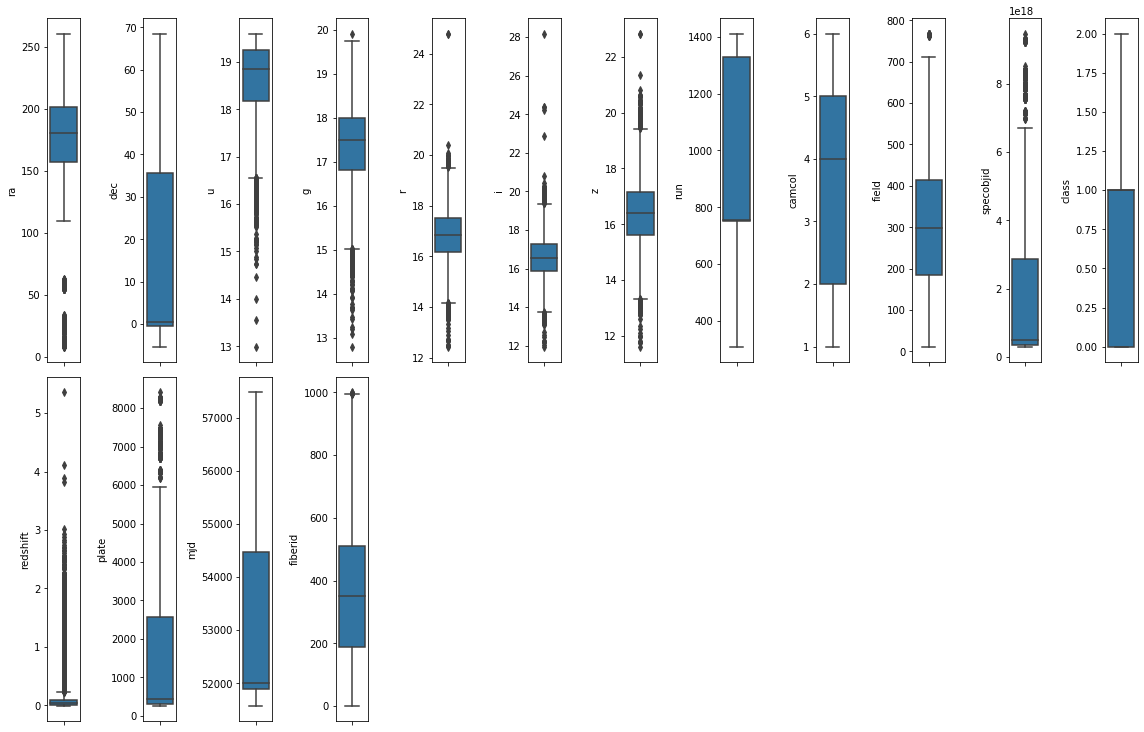

In [32]:
collist=Data.columns
ncol=16
nrow=12
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(ncol,nrow,i+1)
    sns.boxplot(Data[collist[i]],orient='v')
    plt.tight_layout()

In [33]:
#Outliers present in ra,u,g,r,i,specobjid,redshift and in plate.
#Removing 

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [35]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,1,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,1,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,1,0.014019,447,51877,229


In [36]:
print(Data.shape)
print(Data_new.shape)

(10000, 16)
(8698, 16)


In [37]:
Data_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,1,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,1,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,1,0.014019,447,51877,229


In [38]:
df_x=Data_new.drop(['class'],axis=1)
df_x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [39]:
y=Data_new.iloc[:,-5].values.reshape(-1,1)
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [40]:
#Scaling the Training Dataset
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.661365,0.074025,0.963691,0.478487,0.380934,0.348769,0.334290,0.402174,0.6,0.338177,0.463411,0.003142,0.463415,0.650710,0.505676
1,0.661658,0.074642,0.729614,0.511772,0.504870,0.500139,0.496166,0.402174,0.6,0.338177,0.008697,0.003107,0.008689,0.007200,0.557276
2,0.662017,0.074519,0.937411,0.700781,0.640450,0.591978,0.553043,0.402174,0.6,0.339498,0.003208,0.096864,0.003201,0.086593,0.528380
3,0.662850,0.073487,0.470670,0.393445,0.417326,0.422306,0.428550,0.402174,0.6,0.340819,0.463412,0.003064,0.463415,0.650710,0.525284
4,0.662906,0.074199,0.408604,0.327818,0.464483,0.510227,0.526948,0.402174,0.6,0.340819,0.463412,0.003598,0.463415,0.650710,0.527348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,0.433140,0.769921,0.479549,0.281937,0.247133,0.227688,0.211180,0.939312,0.4,0.198151,0.027588,0.045408,0.027591,0.058183,0.255934
8694,0.432779,0.770000,0.774328,0.561295,0.545431,0.529902,0.512018,0.939312,0.4,0.198151,0.027588,0.024145,0.027591,0.058183,0.252838
8695,0.432734,0.771783,0.617013,0.555098,0.572931,0.535055,0.538845,0.939312,0.4,0.199472,0.027587,0.092800,0.027591,0.058183,0.234262
8696,0.433483,0.772888,0.793112,0.646429,0.650177,0.634284,0.600047,0.939312,0.4,0.200793,0.027587,0.013820,0.027591,0.058183,0.235294


# Machine Learning

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
max_acc_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    mnb=MultinomialNB()
    mnb.fit(train_x,train_y)
    pred=mnb.predict(test_x)
    acc_scr=accuracy_score(pred,test_y)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        final_r_state=r_state
    print('Max accuracy score corresponding to ',final_r_state,' is ',max_acc_scr)    

Max accuracy score corresponding to  42  is  0.8298850574712644
Max accuracy score corresponding to  42  is  0.8298850574712644
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44  is  0.8418390804597701
Max accuracy score corresponding to  44 

In [42]:
#Checking if the model is over or under fitting
a_score=cross_val_score(mnb,x,y,scoring='accuracy',cv=5)
print(a_score)
print(np.mean(a_score))

[0.85008616 0.82136703 0.79873491 0.81253594 0.84752589]
0.8260499849932355


In [43]:
#No over or underfitting

In [44]:
#Final MultinomialNB
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=74,test_size=0.25)
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnpred=mnb.predict(test_x)
print('Predicted Class',mnpred)
print('Accuracy Score',accuracy_score(mnpred,test_y))

Predicted Class [1 1 1 ... 1 1 1]
Accuracy Score 0.8436781609195402


Now we will check the accuracy in other models so that we will find the best model for predicting the class.

In [45]:
from sklearn.svm import SVC
sv=SVC()
grid_param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(estimator=sv,param_grid=grid_param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'linear'}
0.9641269354591445


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_score=gd_sr.best_score_
print(best_score)

{'criterion': 'entropy'}
0.9837498083703817


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
grid_param={'n_neighbors':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=knn,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_neighbors': 100}
0.8436302314885789


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
grid_param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 200}
0.9886180731202575


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'n_estimators':[100,200,300,400]}
gd_sc=GridSearchCV(estimator=gbc,param_grid=parameters,scoring='accuracy',cv=5)
gd_sc.fit(train_x,train_y)
best_parameter=gd_sc.best_params_
print(best_parameter)
best_score=gd_sc.best_score_
print(best_score)

{'n_estimators': 400}
0.9885022229035719


From all the model RandomForestClassifier has the highest accuracy score=0.9886180731202575(98.86%) among all the models when the n_estimators are 200.So we save the prediction of RandomForestClassifier for future and Save the model for production.

In [52]:
#Final model
rf=RandomForestClassifier(n_estimators=200)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predicted Class ',rfpred)
print('Accuracy Score',accuracy_score(rfpred,test_y))
print('Confusion Matrix \n',confusion_matrix(rfpred,test_y))
print('Classification Report \n',classification_report(rfpred,test_y))

Predicted Class  [1 1 1 ... 1 1 1]
Accuracy Score 0.9898850574712643
Confusion Matrix 
 [[ 860    6    0]
 [   1 1205    7]
 [   0    8   88]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       866
           1       0.99      0.99      0.99      1213
           2       0.93      0.92      0.92        96

    accuracy                           0.99      2175
   macro avg       0.97      0.97      0.97      2175
weighted avg       0.99      0.99      0.99      2175



In [53]:
test1=np.array([4,4,5,66,8,9,4,6,2,6,5,4,5,6,89]).reshape(1,-1)
rf.predict(test1)

array([2], dtype=int64)

In [55]:
test2=np.array([89,6,5,66,8,3,4,0,2,6,5,55,5,6,12]).reshape(1,-1)
rf.predict(test2)

array([2], dtype=int64)

In [56]:
#Save the prediction of the class of object if it is a STAR,GALAXY or QUASAR.
#'STAR':0,'GALAXY':1,'QSO':2
df=pd.DataFrame(rfpred)
df.to_csv('Class_pred.csv')

In [57]:
#Saving the model for Production
from sklearn.externals import joblib
joblib.dump(rf,'Class_pred.obj')

C:\Users\Biranchi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Class_pred.obj']